# M132A HW4 (coding part)

In [1]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import random

8.9 c) Using code to verify a step size $\alpha$ and initial guess of the form $x^{(0)} = [x_1,0]^T$ so the prescribed method doesn't converge to the solution.

In [8]:
h = lambda x: np.array([4 + 3*x[0] + 2*x[1], 1 + 2*x[0] + 3*x[1]])
a = 1 # step size
x = np.array([2,0])

In [2]:
def zero_finding(h, a, x0, iter):
    """
    Zero finding algorithm
    Inputs:
    h - function h (gradient of some other function)
    a - step size (using a > 0.4 to show divergence)
    x0 - initial guess, of the form (x_1, 0)
    iter - number of iterations to perform
    Output:
    x - approximate zero
    """
    x = x0 # initialize x with initial guess
    for i in range(iter):
        hx = h(x)
        x = x - a * hx
    return x

In [9]:
res = zero_finding(h, a, x0 = x, iter = 10)
print(res)

[1572862 1572865]


26.1 a) Computing the condition of the Hessian of a quadratic loss

In [16]:
X = np.array([[1,3.1,5.1,7.9,10,12],[45,42,50,24,39,28]]) # initialize data 
col_sum = np.sum(X, axis = 1) # sum of the columns
outer_sum = sum(np.outer(X[:,i],X[:,i]) for i in range(X.shape[1]))

hessian = np.zeros((3,3))

hessian[:2, :2] = outer_sum
hessian[:2, 2] = col_sum
hessian[2, :2] = col_sum
hessian[2, 2] = X.shape[1]

print(hessian)

[[3.4303e+02 1.3458e+03 3.9100e+01]
 [1.3458e+03 9.1700e+03 2.2800e+02]
 [3.9100e+01 2.2800e+02 6.0000e+00]]


In [17]:
# calculate the condition of the matrix using the largest and smallest eigenvalues
eigenvalues = np.linalg.eigvals(hessian)
condition = np.max(eigenvalues) / np.min(eigenvalues)
print(f'Condition of X: {condition}')

Condition of X: 83423.05375880032


b) Normalizing X

In [10]:
# calculate means and variances for X to perform normalization
means = np.mean(X, axis = 1)
variances = np.var(X, axis = 1)

# normalize the data (using matrices)
T = np.diag(1/(variances))
M = np.zeros_like(X)
for i in range(X.shape[0]):
    M[i,:] = [means[i]] * X.shape[1]
X_norm = T @ (X - M)

# normalized data 
print(X_norm)

[[-0.37516293 -0.23235166 -0.09634093  0.09407409  0.23688535  0.37289608]
 [ 0.08300395  0.04743083  0.14229249 -0.16600791  0.01185771 -0.11857708]]


In [14]:
# computing hessian for normalized data using helper function
hessian_norm = hessian(X_norm)

# calculate the condition of the matrix
eigenvalues_norm = np.linalg.eigvals(hessian_norm)
condition_norm = np.max(eigenvalues_norm) / np.min(eigenvalues_norm)
print(f'Condition of Normalized Matrix: {condition_norm}')

Condition of Normalized Matrix: 162.98545875307653


The condition of the Hessian matrix calculated using the normalized data is significantly smaller than the condition of the Hessian using the original data. This suggests normalizing the data can reduce the condition of the Hessian for quadratic loss.

In [11]:
# function for computing the hessian for quadratic loss
def hessian(x):
    '''
    Computer the hessian matrix for quadratic loss given data x
    Inputs:
    x - data matrix
    Output:
    hessian - hessian matrix
    '''
    col_sum = np.sum(x, axis = 1) # sum of the columns for the top right 2x1 and bottom left 1x2 matrices
    outer_sum = sum(np.outer(x[:,i],x[:,i]) for i in range(x.shape[1])) # sum of the outer products for top left 2x2 matrix
    
    hessian = np.zeros((3,3)) # initialize the hessian matrix
    hessian[:2, :2] = outer_sum
    hessian[:2, 2] = col_sum
    hessian[2, :2] = col_sum
    hessian[2, 2] = x.shape[1]
    return hessian


26.11 a) Randomly selecting photos from the files provided

In [3]:
# reading in matlab files 
filename1 = 'Te28.mat'
filename2 = 'Lte28.mat'
data1 = scipy.io.loadmat(filename1)
data2 = scipy.io.loadmat(filename2)

# extracting data from files
Te28 = data1['Te28']
Lte28 = data2['Lte28']

In [4]:
indices = np.where(Lte28 == 2)[0] #extracting indices where Lte28 is 2
sampled_indices = np.random.choice(indices, size = 200, replace = False) # sampling 200 indices
Te28_2 = Te28[:, sampled_indices] # extracting Te28 values where Lte28 is 2

In [ ]:
random.seed(17) # setting seed for reproducibility
nums = [2,3,5,7]
cols = []
for num in nums:
    indices = np.where(Lte28 == num)[0] #extracting indices where Lte28 is 2
    sampled_indices = np.random.choice(indices, size = 200, replace = False) # sampling 200 indices
    Te28_num = Te28[:, sampled_indices] # extracting Te28 values where Lte28 is 2
    cols.append(Te28_num)

X = np.concatenate(cols, axis = 1) # concatenating the columns

In [16]:
# perform SVD on X
U, S, Vt = np.linalg.svd(X, full_matrices = False)

# PCA for this problem uses q = 2, but we'll include q as a variable 
q = 2

# extract features from SVD
U_q = U[:, :q]
S_q = S[:q]
Vt_q = Vt[:q, :]

# computing principal components
X_pca = U_q.T @ X

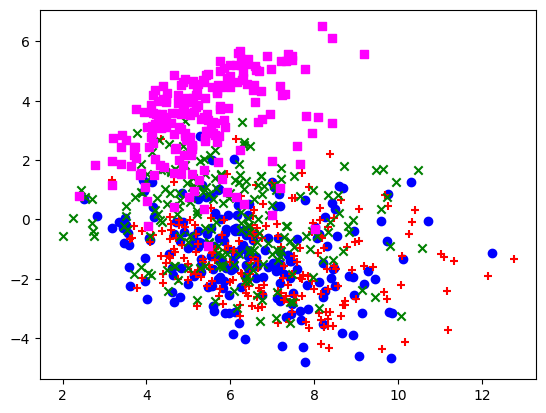

In [17]:
# plotting the principal components
plt.scatter(X_pca[0, :200], X_pca[1, :200], marker = 'o', color = 'blue')
plt.scatter(X_pca[0, 200:400], X_pca[1, 200:400], marker = '+', color = 'red')
plt.scatter(X_pca[0, 400:600], X_pca[1, 400:600], marker = 'x', color = 'green')
plt.scatter(X_pca[0, 600:800], X_pca[1, 600:800], marker = 's', color = 'magenta')
plt.show()

26.11 c) Creating a HOG for X from part a 

In [ ]:
from functions import hog20new # credit to Michael Yang for creating the hog20new function

res = hog20new(X[:, 0].reshape(28, 28).T, 7, 7)
hog_cols = []

# computing hog features for each column of X
for i in range(X.shape[1]):
    res = hog20new(X[:, i].reshape(28, 28).T, 7, 7)
    hog_cols.append(res)

hog = np.array(hog_cols).T # transpose features to match required shape

In [29]:
# apply SVD to the hog matrix to extract 800 2-dimensional features
U, S, Vt = np.linalg.svd(hog, full_matrices = False)

# PCA for this problem uses q = 2, but we'll include q as a variable 
q = 2

# extract features from SVD
U_q = U[:, :q]
S_q = S[:q]
Vt_q = Vt[:q, :]

# computing principal components
hog_pca = U_q.T @ hog

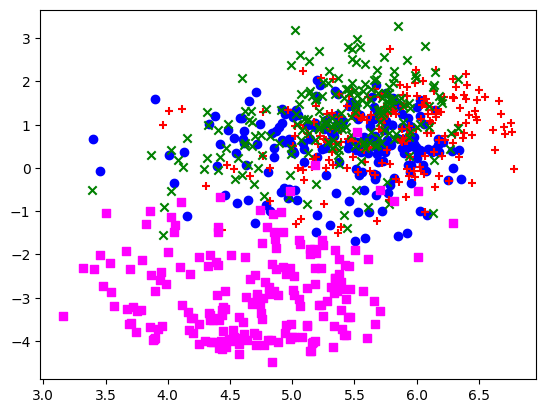

In [30]:
# plotting the principal components of hog matrix
plt.scatter(hog_pca[0, :200], hog_pca[1, :200], marker = 'o', color = 'blue')
plt.scatter(hog_pca[0, 200:400], hog_pca[1, 200:400], marker = '+', color = 'red')
plt.scatter(hog_pca[0, 400:600], hog_pca[1, 400:600], marker = 'x', color = 'green')
plt.scatter(hog_pca[0, 600:800], hog_pca[1, 600:800], marker = 's', color = 'magenta')
plt.show()

The clustering of the red, blue, and green groups doesn't substaintially improve using the HOG matrix compared to the original data with the exception of some green and red principal components. However, the separation of the pink group from the rest of the data improves from applying PCA to the HOG. 

27.1 a) Creating function to evaluate the regularized logistic loss

In [7]:
def reg_log_loss(w, X, y, mu):
    '''
    Computes the regularized logistic loss for a given vector w
    Inputs:
    w - weight vector
    X - data matrix of the shape (N+1)xP where N is the number of features and P is the number of data points
    y - labels vector of the shape Px1
    mu - regularization parameter
    Output:
    loss - regularized logistic loss
    ''' 
    loss = np.mean(np.log(1 + np.exp(np.dot(w,X) * y))) + (mu / 2) * np.inner(w, w) # regularized logistic loss 
    return loss

def reg_log_loss_gradient(w, X, y, mu):
    '''
    Computes the gradient of the regularized logistic loss for a given vector w
    Inputs:
    w - weight vector
    X - data matrix of the shape (N+1)xP where N is the number of features and P is the number of data points
    y - labels vector of the shape Px1
    mu - regularization parameter
    Output:
    gradient - gradient of the regularized logistic loss
    '''
    # Compute the gradient of the logistic loss
    m = X.shape[1]
    predictions = 1 / (1 + np.exp(-np.dot(X.T, w)))
    gradient_logistic_loss = -np.dot(X, (y - predictions)) / m
    
    # Compute the gradient of the regularization term
    gradient_regularization_term = mu * w
    
    # Compute the total gradient
    gradient = gradient_logistic_loss + gradient_regularization_term
    
    return gradient

b) Using the function on a dataset with different weight vectors

In [6]:
# creating data matrix and weight vectors for function 
X = np.array([[1.5,3.5,5,6.9,8.4,10,11.2,1,2.1,3.1,4,5.9,7.9,9,10.5],
             [7,6.5,5,3.7,3,5,1.3,4.5,3.5,5.5,4.2,2.7,2.2,1.6,0.8],
             [1] * 15]) # data matrix

y = np.array([1] * 7 + [-1] * 8) # labels vector

w1 = np.array([-0.3,0,-1])
w2 = np.array([0.1,0.9,-2])
w3 = np.array([0.2,0.6,-3])
w4 = np.array([0.3,0.5,-4])

mu = 0.001 # regularization parameter

In [9]:
# calculating the regularized logistic loss for each weight vector
loss1 = reg_log_loss(w1, X, y, mu)
loss2 = reg_log_loss(w2, X, y, mu)
loss3 = reg_log_loss(w3, X, y, mu)
loss4 = reg_log_loss(w4, X, y, mu)

losses = [loss1, loss2, loss3, loss4]
for num, loss in enumerate(losses):
    print(f'Loss {num + 1}: {loss}')

Loss 1: 1.4912987180591069
Loss 2: 1.5028338449034775
Loss 3: 1.0382429688346009
Loss 4: 1.044183890054391


27.5 a) Inputting and loading matlab data and functions

In [2]:
# loading matlab functions and data (using converted functions)
X2 = scipy.io.loadmat('X2.mat')['X2']
X7 = scipy.io.loadmat('X7.mat')['X7']
T2 = scipy.io.loadmat('T2.mat')['T2']
T7 = scipy.io.loadmat('T7.mat')['T7']

from functions import hog20new, sgd_rlog

b) Converting input data sets to HOGs (training and testing data)

In [3]:
# creating empty 'matrix' for data 
X2_hog_cols = []
X7_hog_cols = []
T2_hog_cols = []
T7_hog_cols = []

# compting hog features for each data set 
for i in range(X2.shape[1]):
    res = hog20new(X2[:, i].reshape(28, 28).T, 7, 7)
    X2_hog_cols.append(res)

X2_hog = np.array(X2_hog_cols).T # transpose matrix so shape matches requirements for later 

for i in range(X7.shape[1]):
    res = hog20new(X7[:, i].reshape(28, 28).T, 7, 7)
    X7_hog_cols.append(res)

X7_hog = np.array(X7_hog_cols).T # transpose matrix so shape matches requirements for later
X_hog = np.concatenate((X2_hog, X7_hog), axis = 1) # combining the hog features for both data sets

for i in range(T2.shape[1]):
    res = hog20new(T2[:, i].reshape(28, 28).T, 7, 7)
    T2_hog_cols.append(res)

T2_hog = np.array(T2_hog_cols).T # transpose matrix so shape matches requirements for later

for i in range(T7.shape[1]):
    res = hog20new(T7[:, i].reshape(28, 28).T, 7, 7)
    T7_hog_cols.append(res)

T7_hog = np.array(T7_hog_cols).T # transpose matrix so shape matches requirements for later

c) Running sgd_log using the HOGs of the input data and testing data 

In [9]:
# testing other loss function and gradient of loss function
def f_rlog(w, X, y, mu):
    """
    logistic regression objective function value.
    - w: weight vector (including bias), shape (dim,)
    - X: augmented data matrix, shape (dim, n_samples)
    - y: labels, shape (n_samples,)
    - mu: regularization parameter.
    Uses the loss: log(1 + exp(-z)), with z = y*(w^T x).
    """
    z = y * (np.dot(w, X))
    # Use log1p for numerical stability: log1p(exp(-z)) computes log(1+exp(-z))
    loss = np.log1p(np.exp(-z))
    return np.sum(loss) + 0.5 * mu * np.sum(w**2)


def g_rlog(w, X, y, mu):
    """
    Compute the gradient for logistic regression.
    - w: weight vector (including bias), shape (dim,)
    - X: augmented data matrix, shape (dim, n_samples)
    - y: labels, shape (n_samples,)
    - mu: regularization parameter.
    The gradient is computed as:
      -Î£ [ y_i * Ïƒ(z_i) * x_i ] + mu * w,
    where Ïƒ(z) = 1/(1+exp(z)) and z = y*(w^T x).
    """
    z = y * (np.dot(w, X))
    sigma = 1 / (1 + np.exp(z))
    grad = -np.dot(X, (y * sigma).T) + mu * w
    return grad

In [ ]:
# defining other variables for the function
mu = 0.002
beta = 13
gamma = 0.01
m = 8
st = 9
K = 1176
y = np.array([1] * 2000 + [-1] * 2000) # labels vector

# define loss function and gradient of the loss function



# calculating sgd_rlog
ws, f, rtm = sgd_rlog(X_hog, y, T2_hog, T7_hog, mu, beta, gamma, m, st, K, f_rlog, g_rlog)

27.8 a) & b) From 27.5 parts a and b we already have the proper data loaded and converted into their respective HOGs
c) Running SVRG_rlog with different parameter values

In [22]:
# experimenting with other loss functions that are more stable
def stable_logistic_loss(w, X, y, mu):
    '''
    Computes the regularized logistic loss for a given vector w with numerical stability
    Inputs:
    w - weight vector
    X - data matrix of the shape (N+1)xP where N is the number of features and P is the number of data points
    y - labels vector of the shape Px1
    mu - regularization parameter
    Output:
    loss - regularized logistic loss
    '''
    z = np.dot(X.T, w)
    logistic_loss = np.mean(np.logaddexp(0, -y * z))
    regularization_term = (mu / 2) * np.dot(w, w)
    loss = logistic_loss + regularization_term
    return loss

def stable_logistic_loss_gradient(w, X, y, mu):
    '''
    Computes the gradient of the regularized logistic loss for a given vector w with numerical stability
    Inputs:
    w - weight vector
    X - data matrix of the shape (N+1)xP where N is the number of features and P is the number of data points
    y - labels vector of the shape Px1
    mu - regularization parameter
    Output:
    gradient - gradient of the regularized logistic loss
    '''
    m = X.shape[1]
    z = np.dot(X.T, w)
    predictions = 1 / (1 + np.exp(-z))
    gradient_logistic_loss = -np.dot(X, (y - predictions)) / m
    gradient_regularization_term = mu * w
    gradient = gradient_logistic_loss + gradient_regularization_term
    return gradient

In [28]:
# credit to Lin Fang from class for translating the function into Python
def SVRG_rlog(X, y, Xte1, Xte2, mu, a, T, st, K):
    """
    SVRG algorithm for logistic regression.
    - X: training data, shape (n_features, n_samples)
    - y: labels, shape (n_samples,), with values +1 or -1.
    - Xte1, Xte2: two test sets, with shapes (n_features, n_test1) and (n_features, n_test2)
    - mu: regularization parameter.
    - a: step size.
    - T: number of inner iterations.
    - st: initial random seed.
    - K: number of outer iterations.
    """
    n_features, P = X.shape
    # Augment training data with a row of ones for bias term
    Xh = np.vstack((X, np.ones((1, P))))
    
    t1 = Xte1.shape[1]
    t2 = Xte2.shape[1]
    A1 = np.vstack((Xte1, np.ones((1, t1))))
    A2 = np.vstack((Xte2, np.ones((1, t2))))
    
    w0 = np.zeros(n_features + 1)
    wt = w0.copy()
    
    f0 = f_rlog(wt, Xh, y, 0)  # Objective computed with mu=0
    f_vals = [f0]
    
    # Initial prediction and confusion matrix
    y1 = np.dot(wt, A1)
    y2 = np.dot(wt, A2)
    C = np.zeros((2,2), dtype=int)
    C[0,0] = np.sum(y1 > 0)
    C[1,0] = t1 - C[0,0]
    C[1,1] = np.sum(y2 < 0)
    C[0,1] = t2 - C[1,1]
    rtm = [(1 - ((C[0,0] + C[1,1]) / C.sum())) * 100]
    
    print(f'iter 0: obj = {f0:.2e}')
    
    tt = 1  # mini-batch size (selecting one sample per inner iteration)
    for k in range(1, K+1):
        gt = stable_logistic_loss_gradient(wt, Xh, y, mu) # can change this with g_rlog for different results
        wk = wt.copy()
        for t in range(1, T+1):
            # Reset the random seed (note: frequent seed resetting is uncommon and mainly used here for reproducibility)
            np.random.seed(st + (k-1)*T + t)
            ind = np.random.permutation(P)
            it = ind[:tt]
            xi = Xh[:, it]   # shape: (n_features+1, tt)
            yi = y[it]       # shape: (tt,)
            gik = stable_logistic_loss_gradient(wk, xi, yi, mu) # can change this with g_rlog for different results
            git = stable_logistic_loss_gradient(wt, xi, yi, mu) # can change this with g_rlog for different results
            gk = gik - git + gt
            wk = wk - a * gk
        wt = wk.copy()
        fk = stable_logistic_loss(wt, Xh, y, mu) # could change this with f_rlog for different results 
        f_vals.append(fk)
        
        y1 = np.dot(wt, A1)
        y2 = np.dot(wt, A2)
        C[0,0] = np.sum(y1 > 0)
        C[1,0] = t1 - C[0,0]
        C[1,1] = np.sum(y2 < 0)
        C[0,1] = t2 - C[1,1]
        rk = (1 - ((C[0,0] + C[1,1]) / C.sum())) * 100
        rtm.append(rk)
        
        print(f'iter {k}: obj = {fk:.2e}')
        
    ws = wt
    print('Objective function at the solution point:')
    fs = f_vals[-1]
    print(fs)
    print('Confusion matrix:')
    print(C)
    print('Rate of misclassification in percentage:')
    print(rtm[-1])
    
    # Plot the objective function values (semilog plot)
    plt.figure(1)
    plt.semilogy(range(0, K+1), f_vals, 'b-', linewidth=1.5)
    plt.xlabel('Iterations k', fontsize=15, fontname='times')
    plt.ylabel('Objective E_L(w_k)', fontsize=15, fontname='times')
    plt.axis([0, K, 1.5e-2, 1])
    plt.grid(True)
    plt.show()
    
    return ws, f_vals, rtm

In [ ]:
# redefining parameter values for the function 
mu = 0 
alpha = 0.15
T = 170
st = 9
K = 29

# calculating SVRG_rlog
w, f, rtm = SVRG_rlog(X_hog, y, T2_hog, T7_hog, mu, alpha, T, st, K)

The lowest rate of misclassification was 1.359, however the objective loss at each iteration is `inf`. Thus, I used a "stabilized" loss function along with it's gradient to calculate SVRG_rlog which resulted in a misclassification rate of about 33% but returned finite loss function values for each iteration. The model was able to accurately predict all of the 7's but had some issues classifying 2's which results in some 2's being perceived as 7's. 